In [ ]:
### Natalie Gonzalez
### Portfolio Update 2
### March 18th, 2025

## Importing and Data Cleaning

### Importing Libraries and Federal Data

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression

df = pd.read_csv("fed_rd_year&gdp (1).csv")   # Assigning csv to variable.
print(df.head())  # Seeing first five rows of the dataset.

  department  1976_gdp1790000000000.0  1977_gdp2028000000000.0  \
0        DHS                      NaN                      NaN   
1        DOC             8.190000e+08             8.370000e+08   
2        DOD             3.569600e+10             3.796700e+10   
3        DOE             1.088200e+10             1.374100e+10   
4        DOT             1.142000e+09             1.095000e+09   

   1978_gdp2278000000000.0  1979_gdp2570000000000.0  1980_gdp2797000000000.0  \
0                      NaN                      NaN                      NaN   
1             8.710000e+08             9.520000e+08             9.450000e+08   
2             3.702200e+10             3.717400e+10             3.700500e+10   
3             1.566300e+10             1.561200e+10             1.522600e+10   
4             1.156000e+09             1.004000e+09             1.048000e+09   

   1981_gdp3138000000000.0  1982_gdp3314000000000.0  1983_gdp3541000000000.0  \
0                      NaN                

## Data Cleaning

### Melting

Melting is useful to seperate each variable into its own column. The "long" formate is easier to observe than the "wide" format.

In [88]:
df_federal_melted = pd.melt(df, id_vars = ["department"],
                            var_name= "Year_GDP", value_name= "Budget")  # Do not include value_vars because all columns need to be melted.
print(df_federal_melted) # Shows Year_GDP combined colunm and Budget column.

    department                  Year_GDP        Budget
0          DHS   1976_gdp1790000000000.0           NaN
1          DOC   1976_gdp1790000000000.0  8.190000e+08
2          DOD   1976_gdp1790000000000.0  3.569600e+10
3          DOE   1976_gdp1790000000000.0  1.088200e+10
4          DOT   1976_gdp1790000000000.0  1.142000e+09
..         ...                       ...           ...
583        NIH  2017_gdp19177000000000.0  3.305200e+10
584        NSF  2017_gdp19177000000000.0  6.040000e+09
585      Other  2017_gdp19177000000000.0  1.553000e+09
586       USDA  2017_gdp19177000000000.0  2.625000e+09
587         VA  2017_gdp19177000000000.0  1.367000e+09

[588 rows x 3 columns]


### Splitting

We split our data because there are two variables in the same column. Splitting helps us to observe individual variables by giving each value their own cell.

In [89]:
df_federal_melted[["Year", "GDP",]] = df_federal_melted["Year_GDP"].str.split("_gdp", expand = True)  # Splitting the "Year_GDP" column.

print(df_federal_melted)  # Returns "Year" and "GDP" as two seperate columns. Still has combined "Year_GDP" column.

    department                  Year_GDP        Budget  Year               GDP
0          DHS   1976_gdp1790000000000.0           NaN  1976   1790000000000.0
1          DOC   1976_gdp1790000000000.0  8.190000e+08  1976   1790000000000.0
2          DOD   1976_gdp1790000000000.0  3.569600e+10  1976   1790000000000.0
3          DOE   1976_gdp1790000000000.0  1.088200e+10  1976   1790000000000.0
4          DOT   1976_gdp1790000000000.0  1.142000e+09  1976   1790000000000.0
..         ...                       ...           ...   ...               ...
583        NIH  2017_gdp19177000000000.0  3.305200e+10  2017  19177000000000.0
584        NSF  2017_gdp19177000000000.0  6.040000e+09  2017  19177000000000.0
585      Other  2017_gdp19177000000000.0  1.553000e+09  2017  19177000000000.0
586       USDA  2017_gdp19177000000000.0  2.625000e+09  2017  19177000000000.0
587         VA  2017_gdp19177000000000.0  1.367000e+09  2017  19177000000000.0

[588 rows x 5 columns]


### Cleaning

Dropping combined columns is helpful because they are no longer useful for observation and analysis. We can do this by using the df.drop function.

In [90]:
df_federal_melted.drop("Year_GDP", axis=1, inplace=True)  # Dropping combined column. This column is no longer needed since we now have "Year" and "GDP".

print(df_federal_melted)

    department        Budget  Year               GDP
0          DHS           NaN  1976   1790000000000.0
1          DOC  8.190000e+08  1976   1790000000000.0
2          DOD  3.569600e+10  1976   1790000000000.0
3          DOE  1.088200e+10  1976   1790000000000.0
4          DOT  1.142000e+09  1976   1790000000000.0
..         ...           ...   ...               ...
583        NIH  3.305200e+10  2017  19177000000000.0
584        NSF  6.040000e+09  2017  19177000000000.0
585      Other  1.553000e+09  2017  19177000000000.0
586       USDA  2.625000e+09  2017  19177000000000.0
587         VA  1.367000e+09  2017  19177000000000.0

[588 rows x 4 columns]


### Numerical Consistency

Large numbers should be consistent in their notation. We do this by using the .replace function.

In [91]:
df_federal_melted["GDP"] = df_federal_melted["GDP"].replace(',', '').astype(float)   # "GDP" into scientific notation. Makes is consistent with "Budget" and easier to understand number.


print(df_federal_melted)

df_federal_melted.head(10)

    department        Budget  Year           GDP
0          DHS           NaN  1976  1.790000e+12
1          DOC  8.190000e+08  1976  1.790000e+12
2          DOD  3.569600e+10  1976  1.790000e+12
3          DOE  1.088200e+10  1976  1.790000e+12
4          DOT  1.142000e+09  1976  1.790000e+12
..         ...           ...   ...           ...
583        NIH  3.305200e+10  2017  1.917700e+13
584        NSF  6.040000e+09  2017  1.917700e+13
585      Other  1.553000e+09  2017  1.917700e+13
586       USDA  2.625000e+09  2017  1.917700e+13
587         VA  1.367000e+09  2017  1.917700e+13

[588 rows x 4 columns]


,department,Budget,Year,GDP
0,DHS,NaN,1976,1.790000e+12
1,DOC,8.190000e+08,1976,1.790000e+12
2,DOD,3.569600e+10,1976,1.790000e+12
3,DOE,1.088200e+10,1976,1.790000e+12
4,DOT,1.142000e+09,1976,1.790000e+12
5,EPA,9.680000e+08,1976,1.790000e+12
6,HHS,9.226000e+09,1976,1.790000e+12
7,Interior,1.152000e+09,1976,1.790000e+12
8,NASA,1.251300e+10,1976,1.790000e+12
9,NIH,8.025000e+09,1976,1.790000e+12


### Saving as CSV

In [92]:
df_federal_melted.to_csv("Clean_Data.csv", index=False)  # Saving and creating csv file for this cleaned dataframe.


## Visualizations

Visualizations help us to see patterns in our dataset! They help us to identify errors and unique findings.

###Line Plot

(<Figure size 1200x600 with 1 Axes>,
 <Axes: title={'center': 'Budget Trends by Department'}, xlabel='Year', ylabel='Budget'>,
 ([0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   21,
   22,
   23,
   24,
   25,
   26,
   27,
   28,
   29,
   30,
   31,
   32,
   33,
   34,
   35,
   36,
   37,
   38,
   39,
   40,
   41],
  [Text(0, 0, '1976'),
   Text(1, 0, '1977'),
   Text(2, 0, '1978'),
   Text(3, 0, '1979'),
   Text(4, 0, '1980'),
   Text(5, 0, '1981'),
   Text(6, 0, '1982'),
   Text(7, 0, '1983'),
   Text(8, 0, '1984'),
   Text(9, 0, '1985'),
   Text(10, 0, '1986'),
   Text(11, 0, '1987'),
   Text(12, 0, '1988'),
   Text(13, 0, '1989'),
   Text(14, 0, '1990'),
   Text(15, 0, '1991'),
   Text(16, 0, '1992'),
   Text(17, 0, '1993'),
   Text(18, 0, '1994'),
   Text(19, 0, '1995'),
   Text(20, 0, '1996'),
   Text(21, 0, '1997'),
   Text(22, 0, '1998'),
   Text(23, 0, '1999'),
   Text(24, 0, '2000')

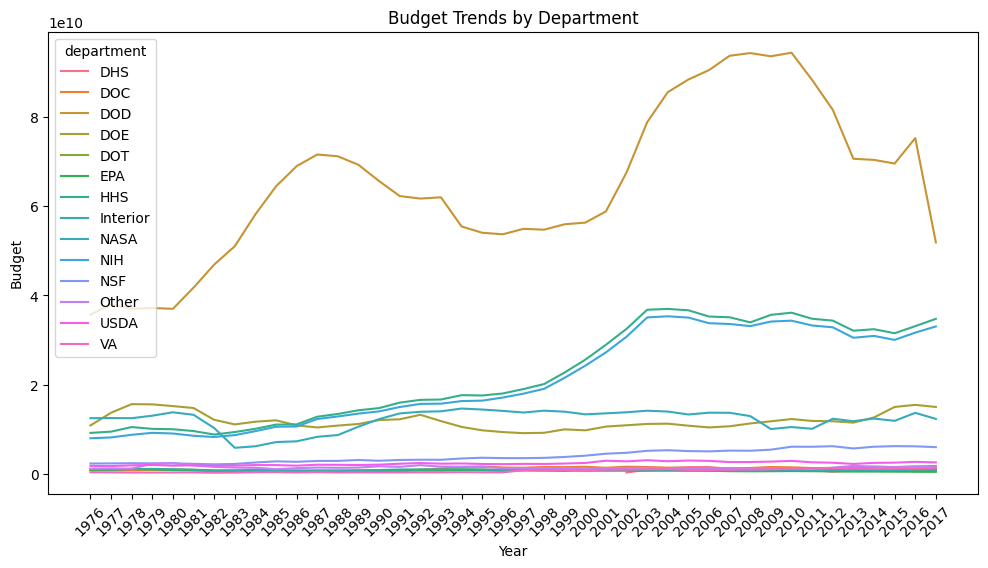

In [122]:
import seaborn as sns  # Import Seaborn library
plt.figure(figsize=(12, 6)),sns.lineplot(data=df_federal_melted, x="Year", y="Budget", hue="department"),plt.xticks(rotation=45), plt.title("Budget Trends by Department")  #Budget Trends by Department

### Barplot

(<Figure size 1200x600 with 1 Axes>,
 <Axes: title={'center': 'Total Budget Per Year'}, xlabel='Year', ylabel='Budget'>,
 ([0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   21,
   22,
   23,
   24,
   25,
   26,
   27,
   28,
   29,
   30,
   31,
   32,
   33,
   34,
   35,
   36,
   37,
   38,
   39,
   40,
   41],
  [Text(0, 0, '1976'),
   Text(1, 0, '1977'),
   Text(2, 0, '1978'),
   Text(3, 0, '1979'),
   Text(4, 0, '1980'),
   Text(5, 0, '1981'),
   Text(6, 0, '1982'),
   Text(7, 0, '1983'),
   Text(8, 0, '1984'),
   Text(9, 0, '1985'),
   Text(10, 0, '1986'),
   Text(11, 0, '1987'),
   Text(12, 0, '1988'),
   Text(13, 0, '1989'),
   Text(14, 0, '1990'),
   Text(15, 0, '1991'),
   Text(16, 0, '1992'),
   Text(17, 0, '1993'),
   Text(18, 0, '1994'),
   Text(19, 0, '1995'),
   Text(20, 0, '1996'),
   Text(21, 0, '1997'),
   Text(22, 0, '1998'),
   Text(23, 0, '1999'),
   Text(24, 0, '2000'),
   T

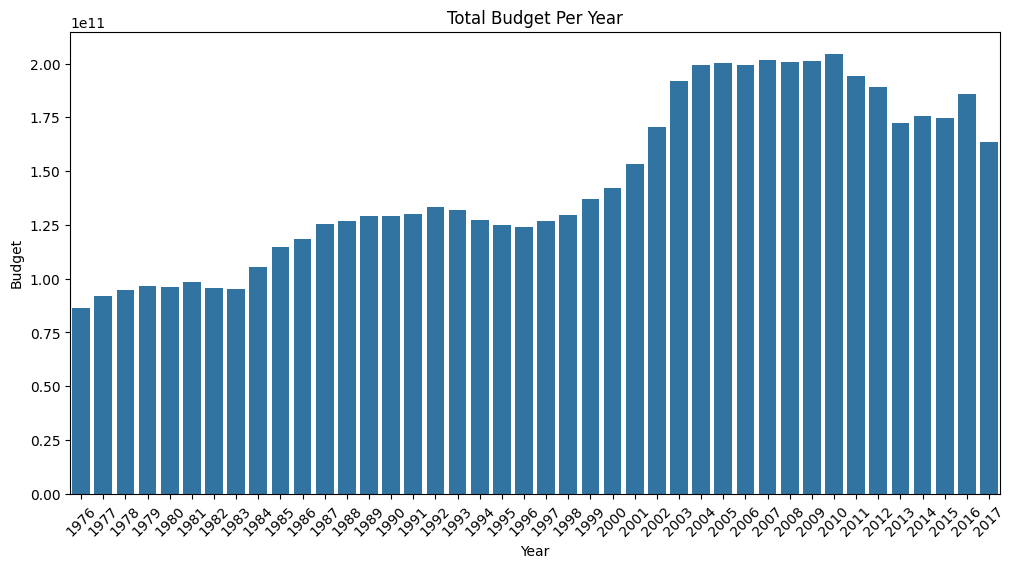

In [123]:
plt.figure(figsize=(12, 6)),sns.barplot(data=df_federal_melted, x="Year",y="Budget", estimator = sum, errorbar=None),plt.xticks(rotation=45),plt.title("Total Budget Per Year")   # Barplot that shows year to year budget.

## Pivot-Table

### Budget Pivot-Table

Budget Pivot Table. Aggregates "Budget" using the mean, with "department" as the index and "Year" as the columns. We can see what the budget for each department was for years 1976 to 2017.

In [85]:
pivot_table_Budget = pd.pivot_table(df_federal_melted, values = "Budget",
                                index = "department", columns = "Year",
                                aggfunc= "mean")

print(pivot_table_Budget)

Year                1976          1977          1978          1979  \
department                                                           
DHS                  NaN           NaN           NaN           NaN   
DOC         8.190000e+08  8.370000e+08  8.710000e+08  9.520000e+08   
DOD         3.569600e+10  3.796700e+10  3.702200e+10  3.717400e+10   
DOE         1.088200e+10  1.374100e+10  1.566300e+10  1.561200e+10   
DOT         1.142000e+09  1.095000e+09  1.156000e+09  1.004000e+09   
EPA         9.680000e+08  9.660000e+08  1.175000e+09  1.102000e+09   
HHS         9.226000e+09  9.507000e+09  1.053300e+10  1.012700e+10   
Interior    1.152000e+09  1.082000e+09  1.125000e+09  1.176000e+09   
NASA        1.251300e+10  1.255300e+10  1.251600e+10  1.307900e+10   
NIH         8.025000e+09  8.214000e+09  8.802000e+09  9.243000e+09   
NSF         2.372000e+09  2.395000e+09  2.446000e+09  2.404000e+09   
Other       1.191000e+09  1.280000e+09  1.237000e+09  2.321000e+09   
USDA        1.837000

###

### GDP Pivot-Table

GDP Pivot Table. Aggregates "GDP" using the mean, with "department" as the index and "Year" as the columns. We can see what the budget for each department was for years 1976 to 2017.

In [84]:
pivot_table_GDP = pd.pivot_table(df_federal_melted, values = "GDP",
                                index = "department", columns = "Year",
                                aggfunc= "mean")

print(pivot_table_GDP)

Year                1976          1977          1978          1979  \
department                                                           
DHS         1.790000e+12  2.028000e+12  2.278000e+12  2.570000e+12   
DOC         1.790000e+12  2.028000e+12  2.278000e+12  2.570000e+12   
DOD         1.790000e+12  2.028000e+12  2.278000e+12  2.570000e+12   
DOE         1.790000e+12  2.028000e+12  2.278000e+12  2.570000e+12   
DOT         1.790000e+12  2.028000e+12  2.278000e+12  2.570000e+12   
EPA         1.790000e+12  2.028000e+12  2.278000e+12  2.570000e+12   
HHS         1.790000e+12  2.028000e+12  2.278000e+12  2.570000e+12   
Interior    1.790000e+12  2.028000e+12  2.278000e+12  2.570000e+12   
NASA        1.790000e+12  2.028000e+12  2.278000e+12  2.570000e+12   
NIH         1.790000e+12  2.028000e+12  2.278000e+12  2.570000e+12   
NSF         1.790000e+12  2.028000e+12  2.278000e+12  2.570000e+12   
Other       1.790000e+12  2.028000e+12  2.278000e+12  2.570000e+12   
USDA        1.790000